QR Code Detector

In [1]:
import cv2 as cv #OpenCV
import numpy as np
from matplotlib import pyplot as plt
import qrcode

In [14]:
'''
# this cell is used to create QR Code
#data = '0xE3CC6E0B'
#data = '0xE3CC6E0C'
#data = '0xE3CC6E0D'
#data = '0xE3CC6E0E'
#data = '0xE3CC6E0F'
data = '0xE3CC6E0G'

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(data)
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save("QR_code.png")
'''

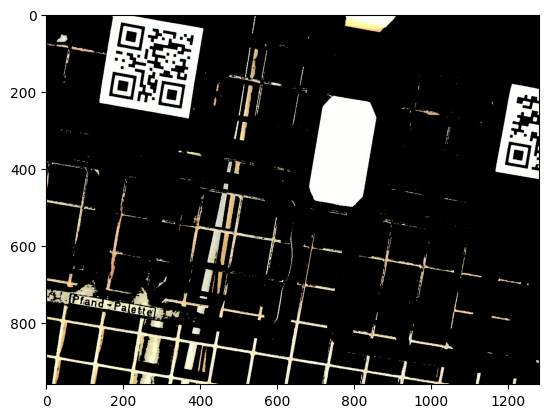

In [17]:
# read an image
image=cv.imread(r'../data/Farmbox_QR/11.jpeg')
# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
# Define the color range for filtering the QR code area
H_MAX=179
H_MIN=0
S_MAX=255
S_MIN=0
V_MAX=255
V_MIN=200

lower_color = (H_MIN, S_MIN, V_MIN)
upper_color = (H_MAX, S_MAX, V_MAX)
# Create a mask to filter the specified color range
mask = cv.inRange(hsv_image, lower_color, upper_color)
# Apply the mask to the original image
result = cv.bitwise_and(image, image, mask=mask)

plt.figure()
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()



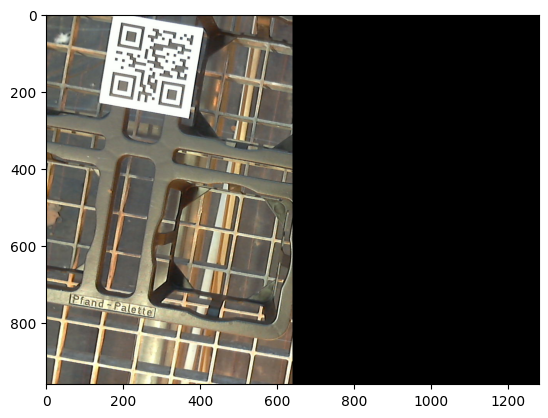

In [16]:
# Get the dimensions of the image
height, width, channels = image.shape
# Define the width of the black region you want to add (you can adjust this value)
black_region_width = int(width/2)
# Create a black image with the same height as the original image and the specified width
black_region = np.zeros((height, black_region_width, channels), dtype=np.uint8)
# Concatenate the black image with the left side of the original image
result_image = np.concatenate((image[:, :-black_region_width, :], black_region), axis=1)

plt.figure()
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.show()

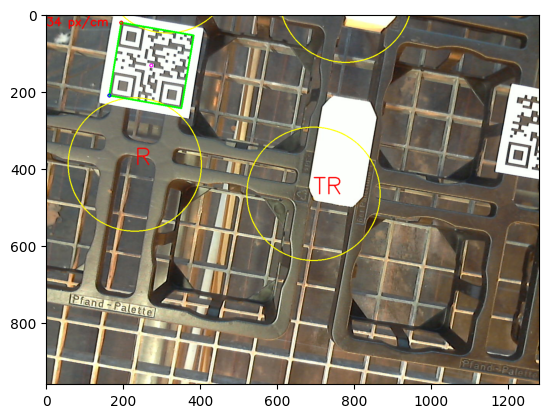

In [18]:
# create detector object
LENGTH_OF_LABEL = 5.5 #cm
DIA_OF_POT = 5 #cm
LENGTH_A = 7.5 #cm
LENGTH_B = 13.5 #cm
QRdetector = cv.QRCodeDetector() #create a detector object


# make a copy of the origin image
image_display = image.copy()
result_image = result.copy()
# Get the dimensions of the image
height, width, channels = image_display.shape
# Define the width of the black region you want to add (you can adjust this value)
black_region_width = int(width/2)


for i in range(0,3):
        retval, points, straight_qrcode = QRdetector.detectAndDecode(result_image)
        if retval:

                centerQR = (points[0].sum(axis=0)/4).astype(int)
                scale_cm2pix = cv.arcLength(points[0], closed=True)/(4*LENGTH_OF_LABEL)
                dia_pot_pix = scale_cm2pix * DIA_OF_POT
                length_a_pix = scale_cm2pix * LENGTH_A
                length_b_pix = scale_cm2pix * LENGTH_B

                vector = points[0][0] - points[0][1]
                angle_rad = np.arctan2(vector[1], vector[0])
                angle_deg = np.degrees(angle_rad)
                #Pot left to QR
                center_x_L = centerQR[0] - length_a_pix * np.cos(angle_rad)
                center_y_L = centerQR[1] - length_a_pix * np.sin(angle_rad)
                #Pot right to QR
                center_x_R = centerQR[0] + length_a_pix * np.cos(angle_rad)
                center_y_R = centerQR[1] + length_a_pix * np.sin(angle_rad)
                #Pot top-left tp QR
                center_x_TL = center_x_L + length_b_pix * np.sin(angle_rad)
                center_y_TL = center_y_L - length_b_pix * np.cos(angle_rad)
                #Pot top-right tp QR
                center_x_TR = center_x_R + length_b_pix * np.sin(angle_rad)
                center_y_TR = center_y_R - length_b_pix * np.cos(angle_rad)
                #Pot bottom-left tp QR
                center_x_BL = center_x_L - length_b_pix * np.sin(angle_rad)
                center_y_BL = center_y_L + length_b_pix * np.cos(angle_rad)
                #Pot bootm-right tp QR
                center_x_BR = center_x_R - length_b_pix * np.sin(angle_rad)
                center_y_BR = center_y_R + length_b_pix * np.cos(angle_rad)

                cv.circle(img=image_display, center=(int(center_x_L),int(center_y_L)), radius=int(dia_pot_pix), color=(0, 255, 255), thickness=2)
                cv.circle(img=image_display, center=(int(center_x_R),int(center_y_R)), radius=int(dia_pot_pix), color=(0, 255, 255), thickness=2)
                cv.circle(img=image_display, center=(int(center_x_TL),int(center_y_TL)), radius=int(dia_pot_pix), color=(0, 255, 255), thickness=2)
                cv.circle(img=image_display, center=(int(center_x_TR),int(center_y_TR)), radius=int(dia_pot_pix), color=(0, 255, 255), thickness=2)
                cv.circle(img=image_display, center=(int(center_x_BL),int(center_y_BL)), radius=int(dia_pot_pix), color=(0, 255, 255), thickness=2)
                cv.circle(img=image_display, center=(int(center_x_BR),int(center_y_BR)), radius=int(dia_pot_pix), color=(0, 255, 255), thickness=2)


                cv.putText(image_display, 'L', (int(center_x_L),int(center_y_L)), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv.LINE_AA)
                cv.putText(image_display, 'R', (int(center_x_R),int(center_y_R)), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv.LINE_AA)
                cv.putText(image_display, 'TL', (int(center_x_TL),int(center_y_TL)), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv.LINE_AA)
                cv.putText(image_display, 'TR', (int(center_x_TR),int(center_y_TR)), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv.LINE_AA)
                cv.putText(image_display, 'BL', (int(center_x_BL),int(center_y_BL)), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv.LINE_AA)
                cv.putText(image_display, 'BR', (int(center_x_BR),int(center_y_BR)), cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv.LINE_AA)

                cv.polylines(image_display, points.astype(int),isClosed=True,color=(0,255,0),thickness=3)
                cv.circle(img=image_display, center=centerQR, radius=4, color=(255, 0, 255), thickness=2)

                cv.circle(img=image_display, center=points[0][0].astype(int), radius=4, color=(255, 0, 0), thickness=2)
                cv.circle(img=image_display, center=points[0][1].astype(int), radius=4, color=(0, 0, 255), thickness=2)
                str_length_QR=str(int(scale_cm2pix))+' px/cm'
                cv.putText(image_display, str_length_QR, (0,30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)

                plt.figure()
                plt.imshow(cv.cvtColor(image_display, cv.COLOR_BGR2RGB))
                plt.show()

                break # break for-loop
        else:
                if i==0:
                        # Concatenate the black image with the left side of the original image
                        result_image=result.copy()
                        result_image = np.concatenate((result[:, :-black_region_width, :], black_region), axis=1)
                if i==1:
                        # Concatenate the black image with the right side of the original image
                        result_image=result.copy()
                        result = np.concatenate((black_region, result[:, :-black_region_width, :]), axis=1)
                if i==2:
                        print('No QR-code found!')

In [44]:
print(angle_deg)
print(angle_rad)
print(centerQR)

9.462321
0.16514868
[495 754]
